---


    
## Project description:
    
We are an analyst at a big online store. Together with the marketing department, we've compiled a list of hypotheses that may help boost revenue.
    
#### Description of the data
Data used in the first part of the project
###### /datasets/hypotheses_us.csv Download dataset
* Hypotheses — brief descriptions of the hypotheses
* Reach — user reach, on a scale of one to ten
* Impact — impact on users, on a scale of one to ten
* Confidence — confidence in the hypothesis, on a scale of one to ten
* Effort — the resources required to test a hypothesis, on a scale of one to ten. The higher the Effort value, the more resource-intensive the test.
    
Data used in the second part of the project
###### /datasets/orders_us.csv Download dataset
* transactionId — order identifier
* visitorId — identifier of the user who placed the order
* date — of the order
* revenue — from the order
* group — the A/B test group that the user belongs to
##### /datasets/visits_us.csv Download dataset
    
* date — date
* group — A/B test group
* visits — the number of visits on the date specified in the A/B test group specified
    
    
### Part 1. Prioritizing Hypotheses
The file hypotheses_us.csv contains nine hypotheses on boosting an online store's revenue with Reach, Impact, Confidence, and Effort specified for each.

#### The task is to:
* Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority.
* Apply the RICE framework to prioritize hypotheses. Sort them in descending order of priority.
* Show how the prioritization of hypotheses changes when you use RICE instead of ICE. Provide an explanation for the changes.
    
### Part 2. A/B Test Analysis
We carried out an A/B test and got the results described in the files orders_us.csv and visits_us.csv.
    
#### The task is to:
##### Analyze the A/B test:
    
* Graph cumulative revenue by group. Make conclusions and conjectures.
* Graph cumulative average order size by group. Make conclusions and conjectures.
* Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.
* Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.
* Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.
* Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.
* Plot a scatter chart of order prices. Make conclusions and conjectures.
* Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.
* Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.
* Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.
* Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.
* Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.
* Make a decision based on the test results. The possible decisions are: 1. Stop the test, consider one of the groups the leader. 2. Stop the test, conclude that there is no difference between the groups. 3. Continue the test.

### Project purpose:
Our ultimate purpose is to prioritize hypotheses, launch an A/B test, and analyze the results.
    



    
## Step 1. Download the data and prepare it for analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import datetime as dt
import scipy.stats as stats
import seaborn as sns

In [2]:
LOCAL_PATH_1 = 'hypotheses_us.csv'
PLATFORM_PATH_1 = '/datasets/hypotheses_us.csv'

LOCAL_PATH_2 = 'orders_us.csv'
PLATFORM_PATH_2 = '/datasets/orders_us.csv'

LOCAL_PATH_3 = 'visits_us.csv'
PLATFORM_PATH_3 = '/datasets/visits_us.csv'



try:
    hypotheses = pd.read_csv(LOCAL_PATH_1,sep=';')
except:
    hypotheses = pd.read_csv(PLATFORM_PATH_1,sep=';')
#-------------------------------------------------    
try:
    order= pd.read_csv(LOCAL_PATH_2)
except:
    order= pd.read_csv(PLATFORM_PATH_2)
#-----------------------------------------------------
try:
    visit = pd.read_csv(LOCAL_PATH_3)
except:
    visit = pd.read_csv(PLATFORM_PATH_3)
 
    
#-----------------------------------------------------
pd.set_option('max_colwidth', 400)
display(hypotheses)
display(hypotheses.info())
display(hypotheses.isnull().sum())
#-----------------------------------
display(order.head())
display(order.info())
display(order.isnull().sum())
#--------------------------------------------
display(visit .head())
display(visit.info())
display(visit.isnull().sum())

#checking duplicates in dataframe
print('duplicate rows:',hypotheses.duplicated().sum())
#---------------------------------------------------
print('duplicate rows:',order.duplicated().sum())
#-------------------------------------------------------------
print('duplicate rows:',visit.duplicated().sum())
#----------------------------------------------------


,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Effort        0
dtype: int64

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


None

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

date      0
group     0
visits    0
dtype: int64

duplicate rows: 0
duplicate rows: 0
duplicate rows: 0




* Conclusion:
    
In the beginning, the datasets have been opened and the general information have been analyzed .There have three dataframe hypotheses,order and visit. The hypotheses data set has 9 rows and 5 columns, The order data set has 1197 rows and 5 columns and The visit data set has 62 rows and 3 columns. There have no missing and duplicate values observed.And all The data types are correct.

In [3]:
#making the column names in lowecase
hypotheses.columns=hypotheses.columns.str.lower()
order.columns=order.columns.str.lower()
visit.columns=visit.columns.str.lower()
pd.set_option('max_colwidth', 400)
display(hypotheses.head(1))
display(order.head(1))
display(visit.head(1))

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6


,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B


,date,group,visits
0,2019-08-01,A,719



    
## Step 2.Prioritizing Hypotheses


In [4]:
#Apply ICE
hypotheses['ICE'] = (hypotheses['impact'] * hypotheses['confidence'])  /hypotheses['effort']
pd.set_option('max_colwidth', 400)
display(hypotheses[['hypothesis','ICE']].sort_values(by='ICE',ascending=False))
#---------------------------------------------------------------------------
#Apply RICE
hypotheses['RICE'] = (hypotheses['impact'] * hypotheses['confidence']* hypotheses['reach'])  /hypotheses['effort']
pd.set_option('max_colwidth', 400)
display(hypotheses[['hypothesis','RICE']].sort_values(by='RICE',ascending=False))

#----------------------------------------------
display(hypotheses.head(1))


,hypothesis,ICE
8,Launch a promotion that gives users discounts on their birthdays,16.200000
0,Add two new channels for attracting traffic. This will bring 30% more users,13.333333
7,Add a subscription form to all the main pages. This will help you compile a mailing list,11.200000
6,Show banners with current offers and sales on the main page. This will boost conversion,8.000000
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,7.000000
1,Launch your own delivery service. This will shorten delivery time,2.000000
5,Add a customer review page. This will increase the number of orders,1.333333
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,1.125000
4,Change the background color on the main page. This will increase user engagement,1.000000


,hypothesis,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,40.0
8,Launch a promotion that gives users discounts on their birthdays,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,9.0
1,Launch your own delivery service. This will shorten delivery time,4.0
5,Add a customer review page. This will increase the number of orders,4.0
4,Change the background color on the main page. This will increase user engagement,3.0


,hypothesis,reach,impact,confidence,effort,ICE,RICE
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333,40.0


###  Show how the prioritization of hypotheses changes when you use RICE instead of ICE

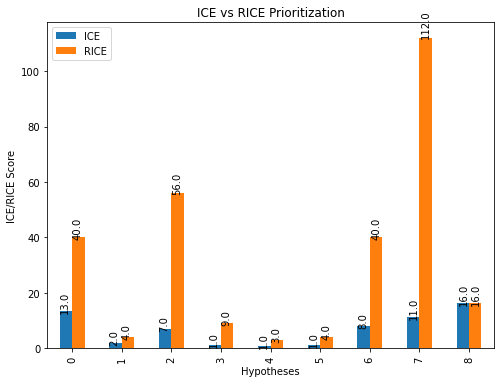

In [5]:
# plot the difference
ax = hypotheses[['hypothesis','ICE','RICE']].plot(kind='bar',stacked=False, figsize=(8,6))

for p in ax.patches:
    ax.annotate(str(p.get_height().round()), (p.get_x() * 1.005, p.get_height() * 1.005), rotation=90)
    
plt.title('ICE vs RICE Prioritization')
plt.xlabel('Hypotheses')
plt.ylabel('ICE/RICE Score')
plt.show()


* Conclusion:

ICE gives 8,0,7 and 6 as the most promissing hypotheses considering index number.For RICE, the most promissing hypotheses are 7,2,0 and 6 considering index number.However, this time index number 7 is in first place.That's because its reach parameter is 10,where the other hypotheses have lower reach values.Different methods change the hypotheses priorities in different level.According to ICE vs RICE graph, top 3 three priotize hypothesis are:

1. Launch a promotion that gives users discounts on their birthdays
2. Add two new channels for attracting traffic. This will bring 30% more users
3. Add a subscription form to all the main pages. This will help you compile a mailing list
    
Apart from , how strong the hypotheses is, it is important to consider how many users will affect.So 'reach' metric plays a vital role from my understandings.


    
## Step 3. A/B Test Analysis

### 1.  Graph cumulative revenue by group. Make conclusions and conjectures

In [6]:
order['date'] = order['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visit['date'] = visit['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [7]:
# remove visitors with both groups
filtered_list=[order.groupby(['visitorid'])['group'].nunique().reset_index().query('group>1')]
display(filtered_list)
filtered_order=~order.visitorid.isin(filtered_list)
unique_order=order[filtered_order]
display(unique_order.head(2))

[       visitorid  group
 2        8300375      2
 44     199603092      2
 51     232979603      2
 55     237748145      2
 66     276558944      2
 84     351125977      2
 97     393266494      2
 114    457167155      2
 119    471551937      2
 122    477780734      2
 192    818047933      2
 236    963407295      2
 299   1230306981      2
 311   1294878855      2
 316   1316129916      2
 318   1333886533      2
 340   1404934699      2
 386   1602967004      2
 393   1614305549      2
 402   1648269707      2
 406   1668030113      2
 422   1738359350      2
 436   1801183820      2
 469   1959144690      2
 487   2038680547      2
 491   2044997962      2
 569   2378935119      2
 591   2458001652      2
 614   2579882178      2
 619   2587333274      2
 622   2600415354      2
 639   2654030115      2
 648   2686716486      2
 661   2712142231      2
 662   2716752286      2
 677   2780786433      2
 710   2927087541      2
 715   2949041841      2
 718   2954449915      2


,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B


,date,group,transactionid,visitorid,revenue
55,2019-08-01,A,24,20,2356.8
66,2019-08-01,B,21,20,1620.0
175,2019-08-02,A,44,38,3860.3
173,2019-08-02,B,45,43,4243.8
291,2019-08-03,A,68,62,5675.5


,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,2356.8,719
1,2019-08-01,B,21,20,1620.0,713
2,2019-08-02,A,44,38,3860.3,1338
3,2019-08-02,B,45,43,4243.8,1294
4,2019-08-03,A,68,62,5675.5,1845


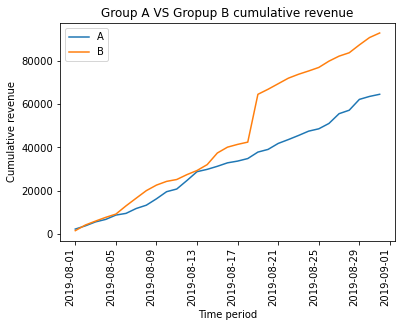

In [8]:
# building an array with unique paired date-group values
datesGroups = unique_order[['date','group']].drop_duplicates()
# getting aggregated cumulative daily data on orders 
ordersAggregated = datesGroups.apply(lambda x: unique_order[np.logical_and(unique_order['date'] <= x['date'], unique_order['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionid' : pd.Series.nunique, 'visitorid' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
display(ordersAggregated.head())
# getting aggregated cumulative daily data on visitors  
visitorsAggregated = datesGroups.apply(lambda x: visit[np.logical_and(visit['date'] <= x['date'], visit['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])

# merging the two tables into one and giving its columns descriptive names
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeData.head(5)) 

# DataFrame with cumulative orders and cumulative revenue by day, group A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# DataFrame with cumulative orders and cumulative revenue by day, group B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Plotting the group A revenue graph 
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Plotting the group B revenue graph 
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend() 
plt.xticks(rotation=90, ha='right')
plt.xlabel("Time period")
plt.ylabel("Cumulative revenue")
plt.title('Group A VS Gropup B cumulative revenue')
plt.show()

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

* Conclusion:

The cumulative metrics of the B group are consistently higer than those of the A group.Fluctuation in conversion was observed in B groups.It seems like abnormally big orders for B groups affected the results overall. It is most likely to early to make decision based on this metric.

### 2. Graph cumulative average order size by group. Make conclusions and conjectures.

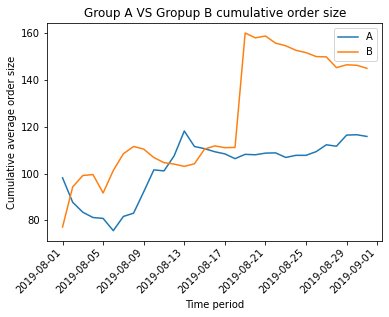

In [9]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.xlabel("Time period")
plt.ylabel("Cumulative average order size")
plt.title('Group A VS Gropup B cumulative order size')
plt.show()

*Conclusion:

The cumulative value of the segments average purchase size is still fluctuating.It is most likely to early to make decision based on this metric.Or we may need to analyse the outliers that are distorting the results.

### 3. Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,2356.8,24,1620.0,21


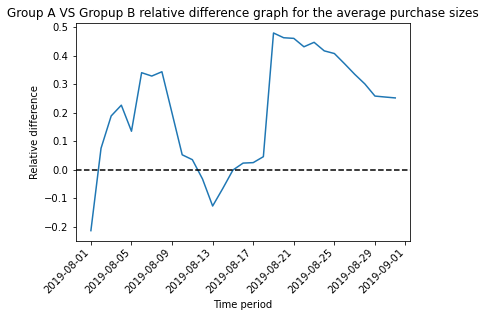

In [10]:
# gathering the data into one DataFrame
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
display(mergedCumulativeRevenue.head(1))

# plotting a relative difference graph for the average purchase sizes
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
# adding the X axis
plt.axhline(y=0, color='black', linestyle='--') 
plt.xticks(rotation=45, ha='right')
plt.xlabel("Time period")
plt.ylabel("Relative difference")
plt.title('Group A VS Gropup B relative difference graph for the average purchase sizes')
plt.show()

* Conclusion:

At several points the difference between the segments spikes. This means there must be some big orders and outliers!

### 4. Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.

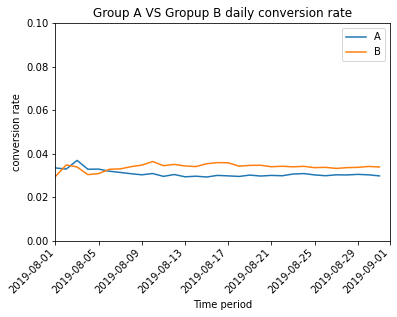

In [11]:
# calculating cumulative conversion
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# selecting data on group A 
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# selecting data on group B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# plotting the graphs
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# setting the axes' scale
plt.axis(["2019-08-01", "2019-09-01", 0, 0.1]) 
plt.xticks(rotation=45, ha='right')
plt.xlabel("Time period")
plt.ylabel("conversion rate")
plt.title('Group A VS Gropup B daily conversion rate')
plt.show()

* Conclusion: 

At the beginning of the test,group A had higher conversion rate but group B gradually gained and established at an almost steady value.The groups were fluctuating around the same value, but then the conversion rate of group A rose before stabilizing, while the conversion rate of group B increased but then stabilized, too.

### 5. Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.

,visitorid,group,transactionid,revenue
0,5114589,B,1,10.8


,userid,group,orders,revenue
1079,4256040402,A,7,110.528571
619,2458001652,B,6,78.766667
511,2038680547,A,5,28.380000
596,2378935119,B,5,247.600000
618,2458001652,A,5,103.540000
595,2378935119,A,4,248.025000
45,199603092,A,4,77.975000
941,3717692402,B,4,36.700000
963,3803269165,B,4,42.825000
58,237748145,A,4,15.500000


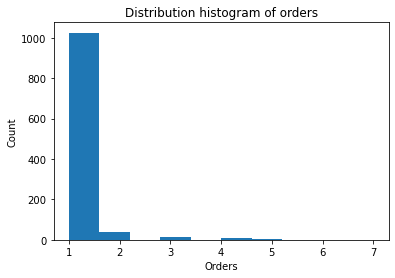

In [12]:
order_2=unique_order.copy()
ordersByUsers = (unique_order.drop(['date'], axis=1).groupby(['visitorid','group'], as_index=False).agg({'transactionid': pd.Series.nunique,'revenue': pd.Series.mean}))

display(ordersByUsers.head(1))
ordersByUsers.columns = ['userid', 'group','orders','revenue']

display(ordersByUsers.sort_values(by='orders', ascending=False).head(10))
plt.hist(ordersByUsers['orders']) 
plt.xlabel("Orders")
plt.ylabel("Count")
plt.title('Distribution histogram of orders')
plt.show()

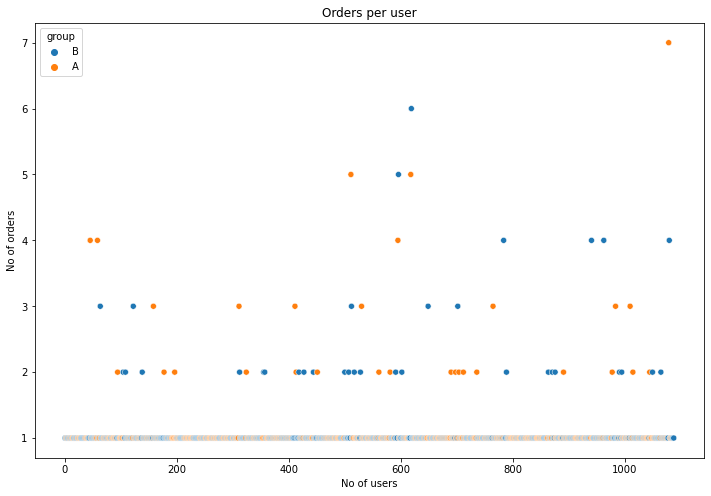

In [13]:
plt.figure(figsize=(12,8))
x_values = pd.Series(range(0,len(ordersByUsers)))
ax= sns.scatterplot(data=ordersByUsers, x=x_values, y="orders",hue="group", legend="full")
ax.set(xlabel='No of users', ylabel='No of orders',title='Orders per user')
plt.show()

*Conclusion:

There are users with 7, 6, 5, 4 orders. That's a lot more than a regular user would place in 4 days.The majority of customers placed only one order. However, a significant share placed two to three apiece.There are indeed a lot of users with two to three orders. The exact share remains unknown, since it's not clear whether we should consider them anomalies or not.

### 6. Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.

In [14]:
print(np.percentile(ordersByUsers['orders'], [90, 95, 99])) 

[1. 2. 4.]


*Conclusion:  

Not more than 5% of users placed more than 2 orders, and 10% of users made more than one.
Thus, it would be reasonable to set two or three orders per user as the lower limit for the number of orders and to filter anomalies on that basis. 

### 7. Plot a scatter chart of order prices. Make conclusions and conjectures.

,userid,group,orders,revenue
486,1920142716,B,1,19920.4
529,2108080724,B,1,3120.1
330,1316129916,A,1,1450.2
328,1307669133,A,1,1425.8
224,888512513,B,1,1335.6
1084,4266935830,B,1,1220.2
1083,4266935830,A,1,1220.2
1048,4133034833,A,1,1050.0
291,1164614297,A,1,1025.8
27,148427295,A,1,1015.9


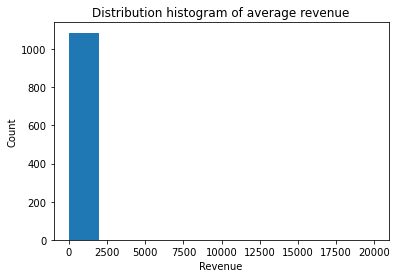

In [15]:
display(ordersByUsers.sort_values(by='revenue', ascending=False).head(10))
plt.hist(ordersByUsers['revenue']) 
plt.xlabel("Revenue")
plt.ylabel("Count")
plt.title('Distribution histogram of average revenue')
plt.show()

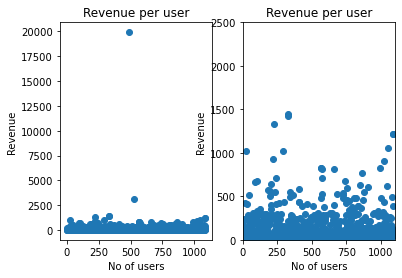

In [16]:
from pylab import *
x_values = pd.Series(range(0,len(ordersByUsers)))
subplot(1,2,1)
plt.scatter(x_values, ordersByUsers['revenue']) 
plt.xlabel("No of users")
plt.ylabel("Revenue")
plt.title('Revenue per user')

subplot(1,2,2)
plt.scatter(x_values, ordersByUsers['revenue']) 
plt.xlabel("No of users")
plt.ylabel("Revenue")
plt.title('Revenue per user')
plt.axis([0, 1100, 0, 2500]) 
plt.show()

* Conclusion:


There are users with 19920 usd average revenue. That's a lot more than a regular user would buy in 4 days.The majority of customers placed order in the average price range less than 1500. The exact share remains unknown, since it's not clear whether we should consider them anomalies or not.

### 8. Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.

In [17]:
print(np.percentile(ordersByUsers['revenue'], [90, 95, 99])) 

[280.8   435.62  908.704]



*Conclusion:  

Not more than 5% of users average order price more than 435 Usd, and 10% of users made more than 281 Usd.
Thus, it would be reasonable to set 435 Usd per user as the lower limit for the order price and to filter anomalies on that basis. 

### 9. Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.



**Testing:**
Let's compare the sample means for conversion:
1. H0  - the sample means have no difference.
1. H1  - the sample means are different.
1. alpha - 0.05    

In [18]:
ordersByUsersA = unique_order[unique_order['group']=='A'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = unique_order[unique_order['group']=='B'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visit[visit['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visit[visit['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB,alternative= "two-sided")[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

0.017
0.138


*Conclusion: 

Based on the raw data, there is no difference between groups A and B.
The first row of the output gives us the p-value, 0.017, which is greater than 0.05. So we can't reject the null hypothesis that there's  not a statistically significant difference in conversion between the groups. But the relative difference of group B is 13.8% (the second row of the output).

### 10.Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.



**Testing:**
Let's compare the sample means for order size:
1. H0  - the sample means have no difference.
1. H1  - the sample means are different.
1. alpha - 0.05    

In [19]:
print('{0:.3f}'.format(stats.mannwhitneyu(order[order['group']=='A']['revenue'], order[order['group']=='B']['revenue'],alternative= "two-sided")[1]))
print('{0:.3f}'.format(order[order['group']=='B']['revenue'].mean()/order[order['group']=='A']['revenue'].mean()-1)) 

0.692
0.252


* Conclusion:

The p-value is considerably higher than 0.05, so there's no reason to reject the null hypothesis and conclude that average order size differs between the groups. Nonetheless, the average order size for group B is smaller than it is for group A and it is almost 25% bigger.So, it is not statistically significant.

### 11. Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.

In [20]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)
usersWithExpensiveOrders = unique_order[unique_order['revenue'] > 435]['visitorid']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape) 

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
(75,)


In [21]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visit[visit['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visit[visit['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0) 



**Testing:**
Let's compare the sample means for filtered conversion:
1. H0  - the sample means have no difference.
1. H1  - the sample means are different.
1. alpha - 0.05    

In [22]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered,alternative= "two-sided")[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.014
0.171


* Conclusion: 

We have 75 anomalous users in total.The results for conversion after filtering anomalies didn't change as p-value is higher than 0.05, there's no reason to reject the null hypothesis.So, it is not statistically significant.


### 12. Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.



**Testing:**
Let's compare the sample means for filtered order size:
1. H0  - the sample means have no difference.
1. H1  - the sample means are different.
1. alpha - 0.05    

In [23]:
print('{0:.3f}'.format(stats.mannwhitneyu(order[np.logical_and(order['group']=='A',np.logical_not(order['visitorid'].isin(abnormalUsers)))]['revenue'],order[np.logical_and(order['group']=='B',np.logical_not(order['visitorid'].isin(abnormalUsers)))]['revenue'],alternative = "two-sided")[1]))

print('{0:.3f}'.format(order[np.logical_and(order['group']=='B',np.logical_not(order['visitorid'].isin(abnormalUsers)))]['revenue'].mean()/order[np.logical_and(order['group']=='A',np.logical_not(order['visitorid'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

0.750
-0.027


*Conclusion:
    
The p-value of average order size between the groups increased, but now the difference between the segments is 2.7% instead of 25%.The p-value is considerably higher than 0.05, so there's no reason to reject the null hypothesis and conclude that average order size differs between the groups.So, it is not statistically significant.

### 13. Make a decision based on the test results. The possible decisions are: 1. Stop the test, consider one of the groups the leader. 2. Stop the test, conclude that there is no difference between the groups. 3. Continue the test.

*Conclusion:

We didn't get a statistics significant difference between the groups in conversion and in order size.Filtering out the outliers decreased the amount off noise in the data: the variance decreased.So than even 2.7% differnce in order size became statiscally significant.Based on these facts, we can conclude that the test is unsuccessful and should be stopped. There's no use continuing it, since the probability that group B will turn out to be better than group A is almost nonexistent.



## Overall conclusion
    

## Step 1. Download the data and prepare it for analysis

In the beginning, the datasets have been opened and the general information have been analyzed .There have three dataframe hypotheses,order and visit. The hypotheses data set has 9 rows and 5 columns, The order data set has 1197 rows and 5 columns and The visit data set has 62 rows and 3 columns. There have no missing and duplicate values observed.And all The data types are correct.

## Step 2.Prioritizing Hypotheses

ICE gives 8,0,7 and 6 as the most promissing hypotheses considering index number.For RICE, the most promissing hypotheses are 7,2,0 and 6 considering index number.However, this time index number 7 is in first place.That's because its reach parameter is 10,where the other hypotheses have lower reach values.Different methods change the hypotheses priorities in different level.Apart from , how strong the hypotheses is, it is important to consider how many users will affect.So 'reach' metric plays a vital role from my understandings.

## Step 3. A/B Test Analysis

* The cumulative metrics of the B group are consistently higer than those of the A group.Fluctuation in conversion was observed in B groups.It seems like abnormally big orders for B groups affected the results overall. It is most likely to early to make decision based on this metric.

* The cumulative value of the segments average purchase size is still fluctuating.It is most likely to early to make decision based on this metric.Or we may need to analyse the outliers that are distorting the results.

* At several points the difference between the segments spikes. This means there must be some big orders and outliers!

* At the beginning of the test,group A had higher conversion rate but group B gradually gained and established at an almost steady value.The groups were fluctuating around the same value, but then the conversion rate of group A rose before stabilizing, while the conversion rate of group B increased but then stabilized, too.

* There are users with 11, 9, 8, 5 orders. That's a lot more than a regular user would place in 4 days.The majority of customers placed only one order. However, a significant share placed two to three apiece.There are indeed a lot of users with two to three orders. The exact share remains unknown, since it's not clear whether we should consider them anomalies or not.

* Not more than 5% of users placed more than 2 orders, and 10% of users made more than one. Thus, it would be reasonable to set two or three orders per user as the lower limit for the number of orders and to filter anomalies on that basis.

* There are users with 19920 usd average revenue. That's a lot more than a regular user would buy in 4 days.The majority of customers placed order in the average price range less than 2500. The exact share remains unknown, since it's not clear whether we should consider them anomalies or not.

* Not more than 5% of users average order price more than 427 Usd, and 10% of users made more than 281 Usd. Thus, it would be reasonable to set 427 Usd per user as the lower limit for the order price and to filter anomalies on that basis.

* Based on the raw data, there is no difference between groups A and B. The first row of the output gives us the p-value, 0.017, which is greater than 0.05. So we can't reject the null hypothesis that there's not a statistically significant difference in conversion between the groups. But the relative difference of group B is 13.8% (the second row of the output)

* The p-value is considerably higher than 0.05, so there's no reason to reject the null hypothesis and conclude that average order size differs between the groups. Nonetheless, the average order size for group B is smaller than it is for group A and it is almost 25% bigger.So, it is not statistically significant.

* We have 75 anomalous users in total.The results for conversion after filtering anomalies didn't change as p-value is higher than 0.05, there's no reason to reject the null hypothesis.So, it is not statistically significant.

* We didn't get a statistics significant difference between the groups in conversion and in order size.Filtering out the outliers decreased the amount off noise in the data: the variance decreased.So than even 2.7% differnce in order size became statiscally significant.Based on these facts, we can conclude that the test is unsuccessful and should be stopped. There's no use continuing it, since the probability that group B will turn out to be better than group A is almost nonexistent.
